**Step-1:Read and load the dataset**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/Me-Rajdip/Data-Set/main/Auto%20Sales%20data.csv')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


**Step-2:Preprocess and EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [8]:
df.isnull().sum()


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [9]:
df.isnull().sum()


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

**Step-3:Data visualization**

C:\Users\Comp_3\AppData\Local\Temp\ipykernel_12320\2638296324.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


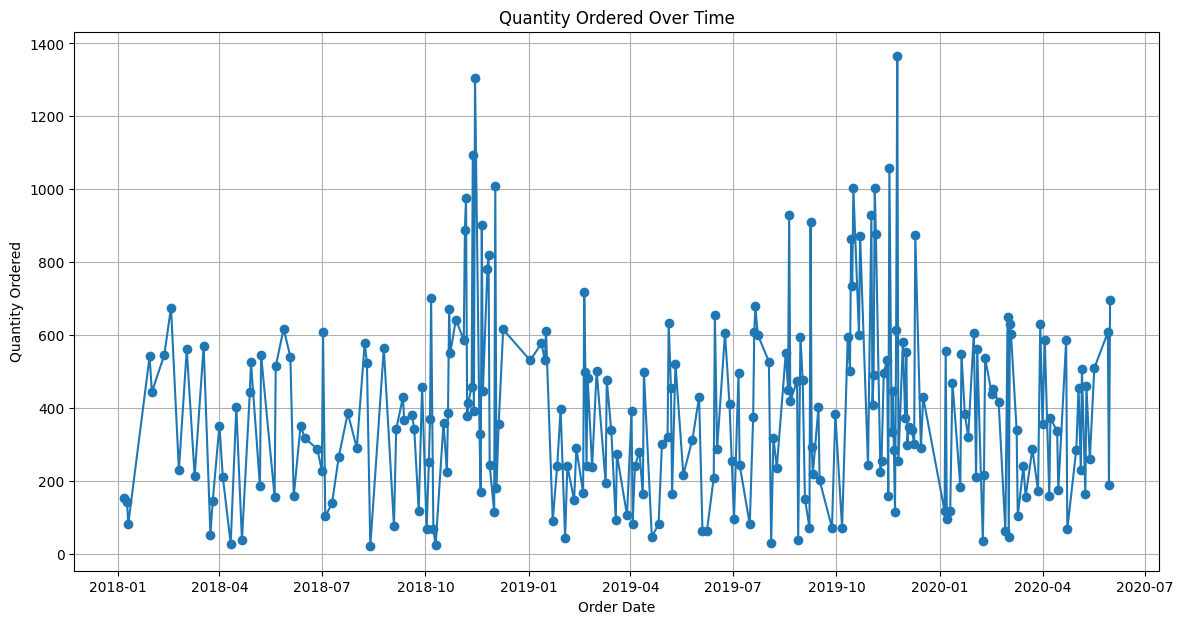

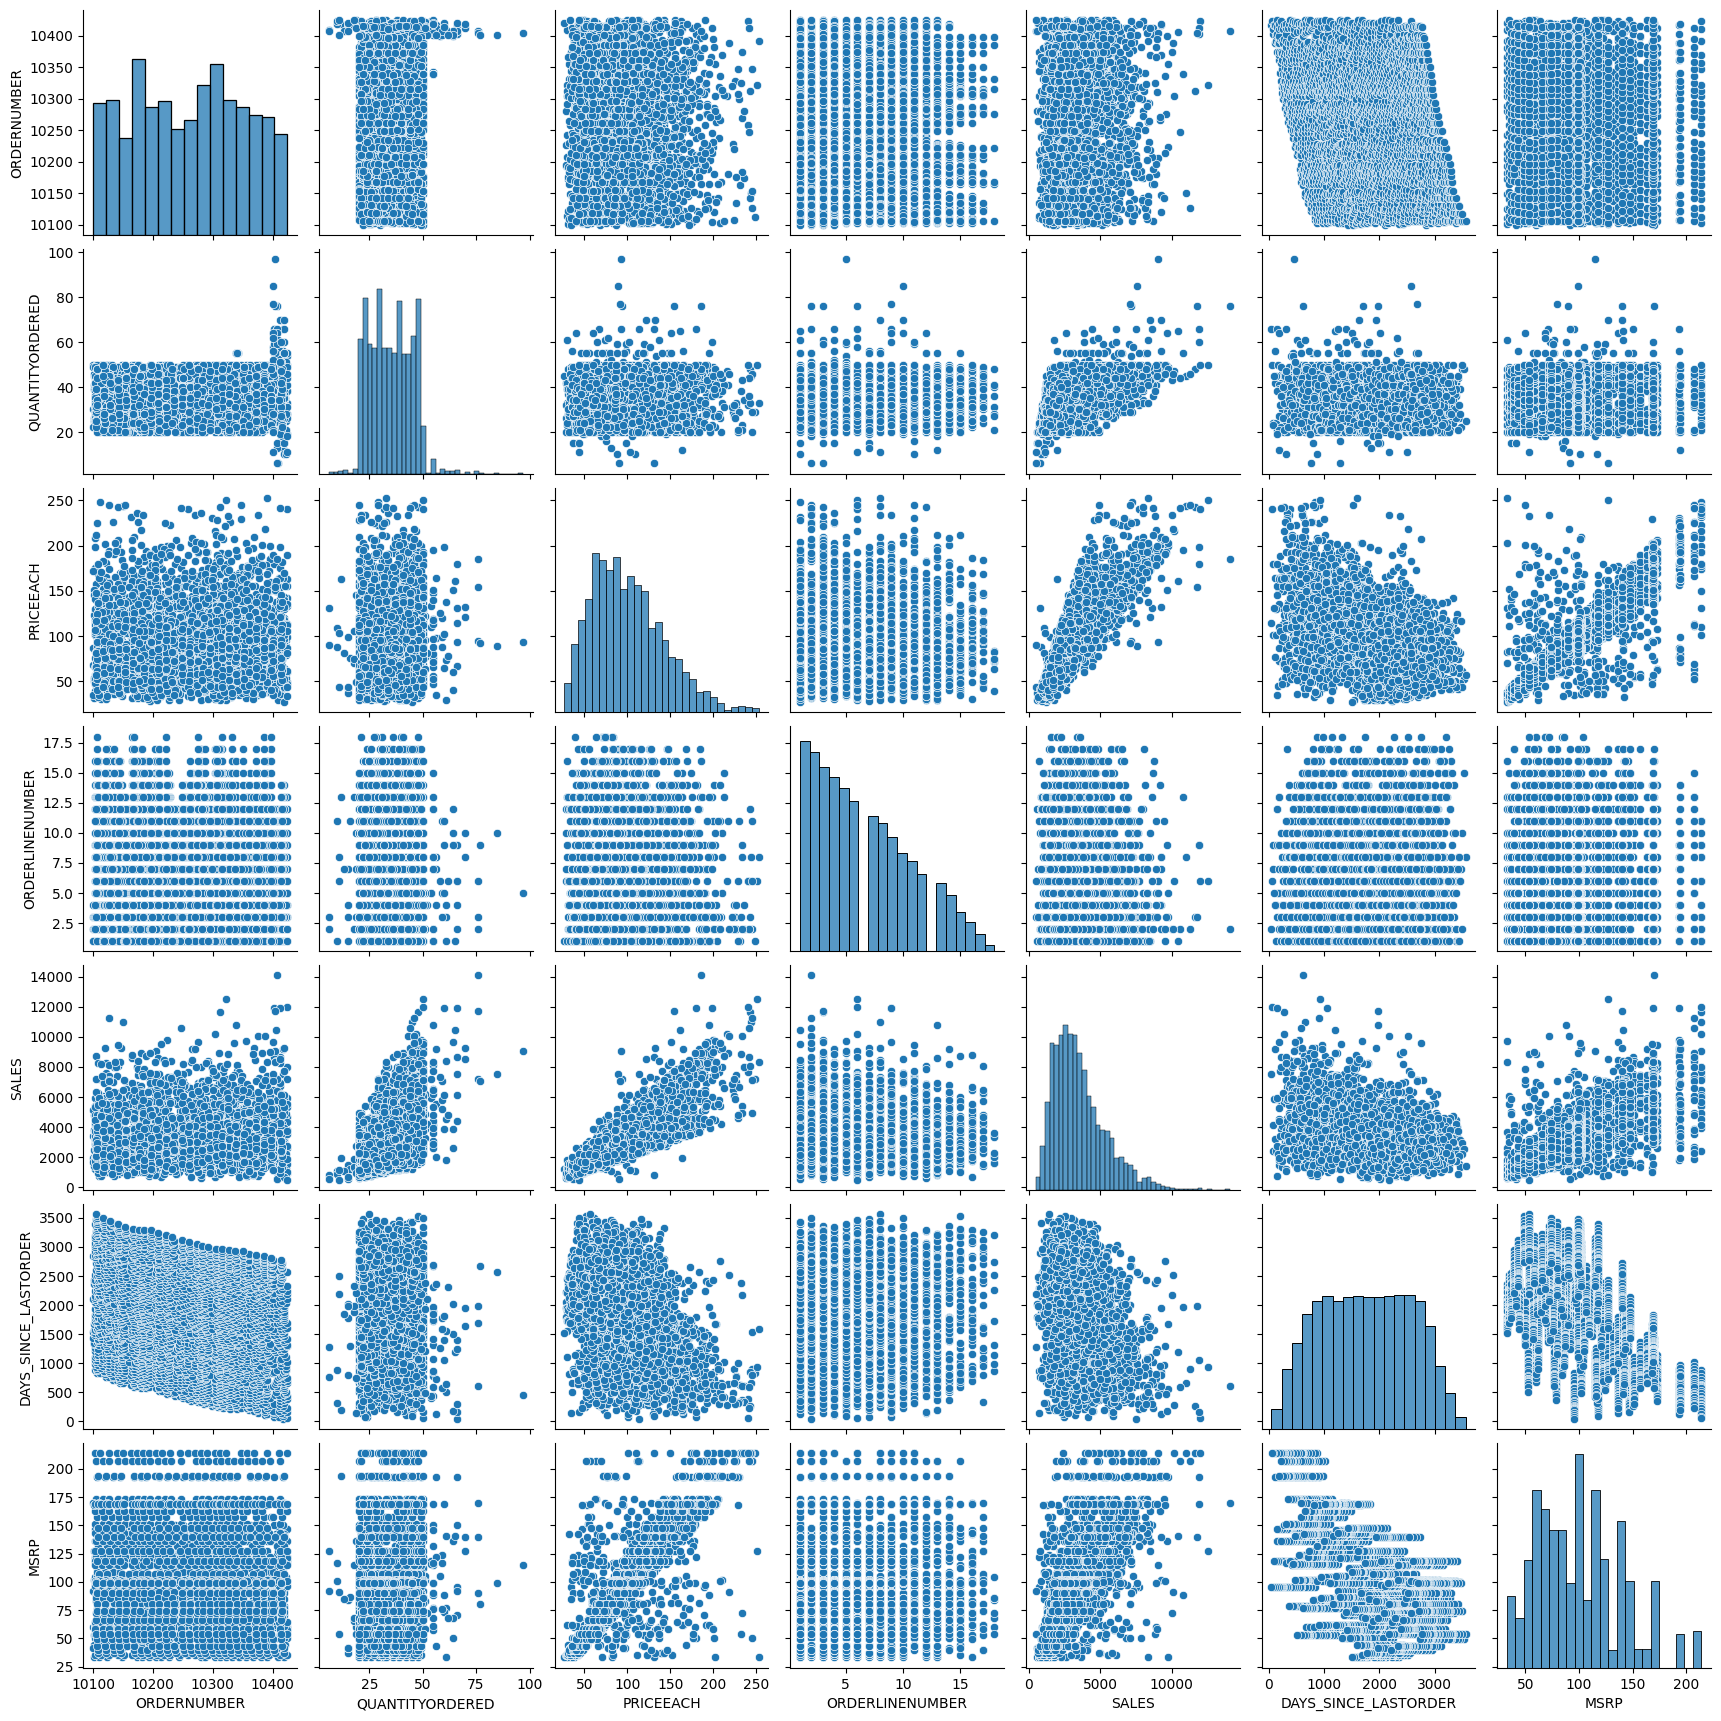

In [10]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group data by ORDERDATE and sum the quantity
grouped_data = df.groupby('ORDERDATE')['QUANTITYORDERED'].sum()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
plt.title('Quantity Ordered Over Time')
plt.xlabel('Order Date')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()


sns.pairplot(df)

<Figure size 1400x700 with 0 Axes>

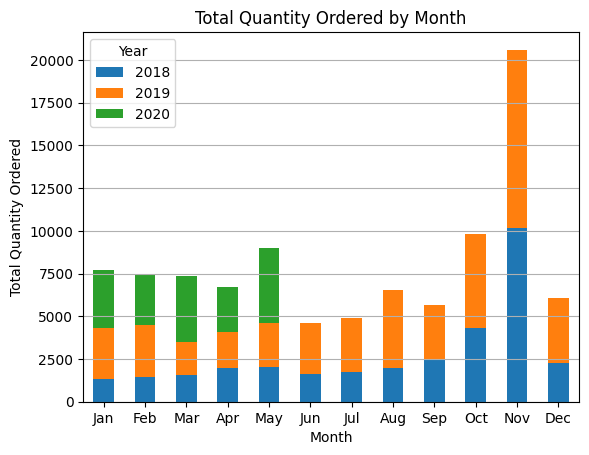

In [11]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month

grouped_data = df.groupby(['Year', 'Month'])['QUANTITYORDERED'].sum().unstack(level=0)

plt.figure(figsize=(14, 7))
grouped_data.plot(kind='bar', stacked=True)

plt.title('Total Quantity Ordered by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')

plt.show()


**Step-4 Define Traning and Testing Dataset**

In [12]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Year', 'Month'],
      dtype='object')

In [13]:
X = df.drop(['SALES'], axis=1)
y = df['SALES']

In [14]:
X.columns


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Year', 'Month'],
      dtype='object')

In [15]:
y.shape

(2747,)

In [16]:
X1 = X.drop(['PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'CUSTOMERNAME'],axis=1)

In [17]:
#X1 = pd.get_dummies(X1)
X1

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,DEALSIZE,Year,Month
0,10107,30,95.70,2,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,NYC,10022,USA,Small,2018,2
1,10121,34,81.35,5,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims,51100,France,Small,2018,5
2,10134,41,94.74,2,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Paris,75508,France,Medium,2018,7
3,10145,45,83.26,6,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Pasadena,90003,USA,Medium,2018,8
4,10168,36,96.66,1,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Burlingame,94217,USA,Medium,2018,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2019-12-02,2924,Shipped,Ships,54,S72_3212,Madrid,28034,Spain,Small,2019,12
2743,10373,29,137.19,1,2020-01-31,2865,Shipped,Ships,54,S72_3212,Oulu,90110,Finland,Medium,2020,1
2744,10386,43,125.99,4,2020-03-01,2836,Resolved,Ships,54,S72_3212,Madrid,28034,Spain,Medium,2020,3
2745,10397,34,62.24,1,2020-03-28,2810,Shipped,Ships,54,S72_3212,Toulouse,31000,France,Small,2020,3


<Axes: ylabel='Frequency'>

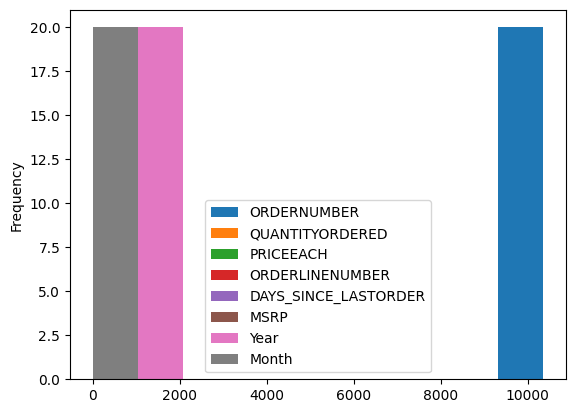

In [18]:
X1.head(20).plot.hist()

**Step-5--> Identify categorical columns & Apply one-hot encoding to categorical columns**

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = X1.select_dtypes(include=['object']).columns

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'  
)


X1_encoded = ct.fit_transform(X1)

# Convert the transformed array back to a DataFrame for better handling
X1_encoded = pd.DataFrame(X1_encoded, columns=ct.get_feature_names_out())

**Step-6--> split the data and Train the Random Forest model**

In [45]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_encoded, y, test_size=0.25, random_state=42)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

**Make predictions**

In [46]:
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Mean Squared Error (MSE): 35427.85
R-squared (R2 Score): 0.99


**Step-6 > Print the classification report**

In [47]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

warnings.filterwarnings('ignore')

# Step 1: Convert SALES (y) into discrete categories
bins = [0, 5000, 10000, 20000, np.inf]  # Define bins for categorization
labels = ['Low', 'Medium', 'High', 'Very High']  # Define labels for bins
y_class = pd.cut(y, bins=bins, labels=labels)

# Step 2: Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X1_encoded, y_class, test_size=0.25, random_state=42)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_class = rf_classifier.predict(X_test)

# Step 5: Print the classification report
print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.95      0.99      0.97       544
      Medium       0.94      0.81      0.87       140

    accuracy                           0.95       687
   macro avg       0.63      0.60      0.62       687
weighted avg       0.95      0.95      0.95       687



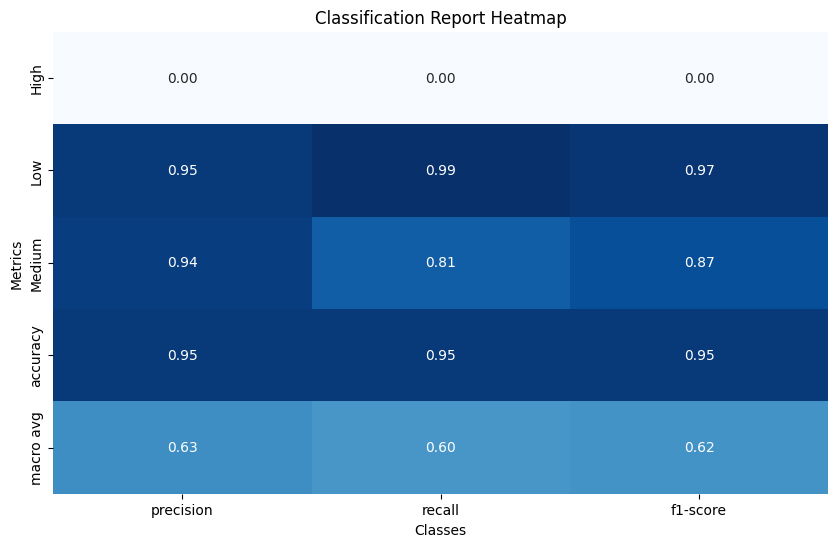

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report
report = classification_report(y_test, y_pred_class, output_dict=True)  # Output as a dictionary

# Convert the report to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot a heatmap of the classification metrics
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()


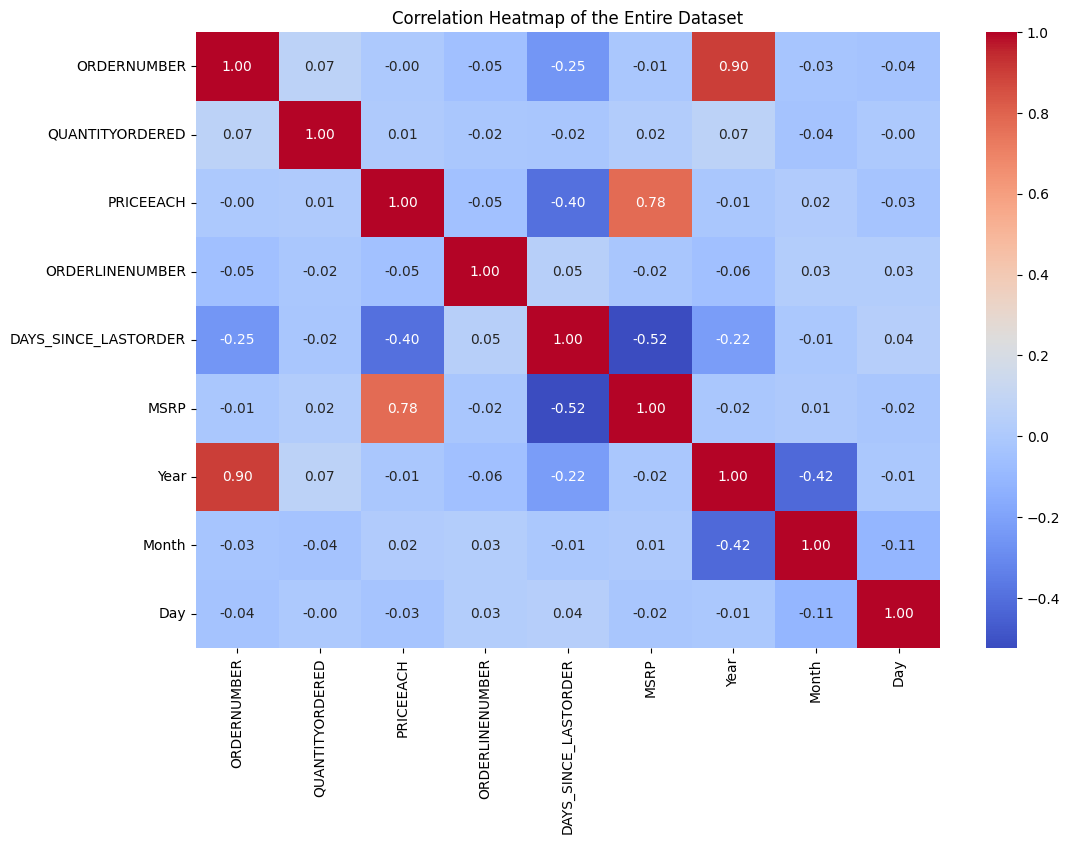

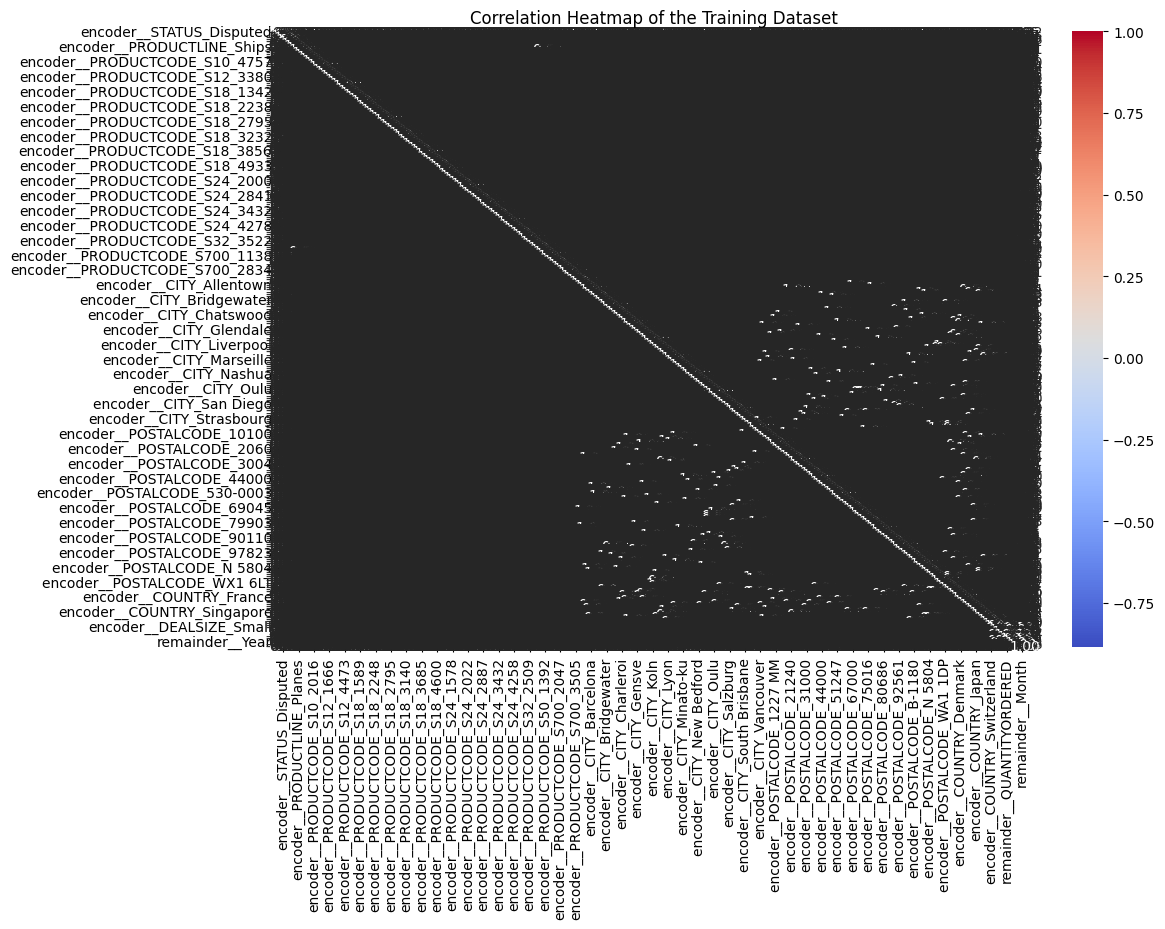

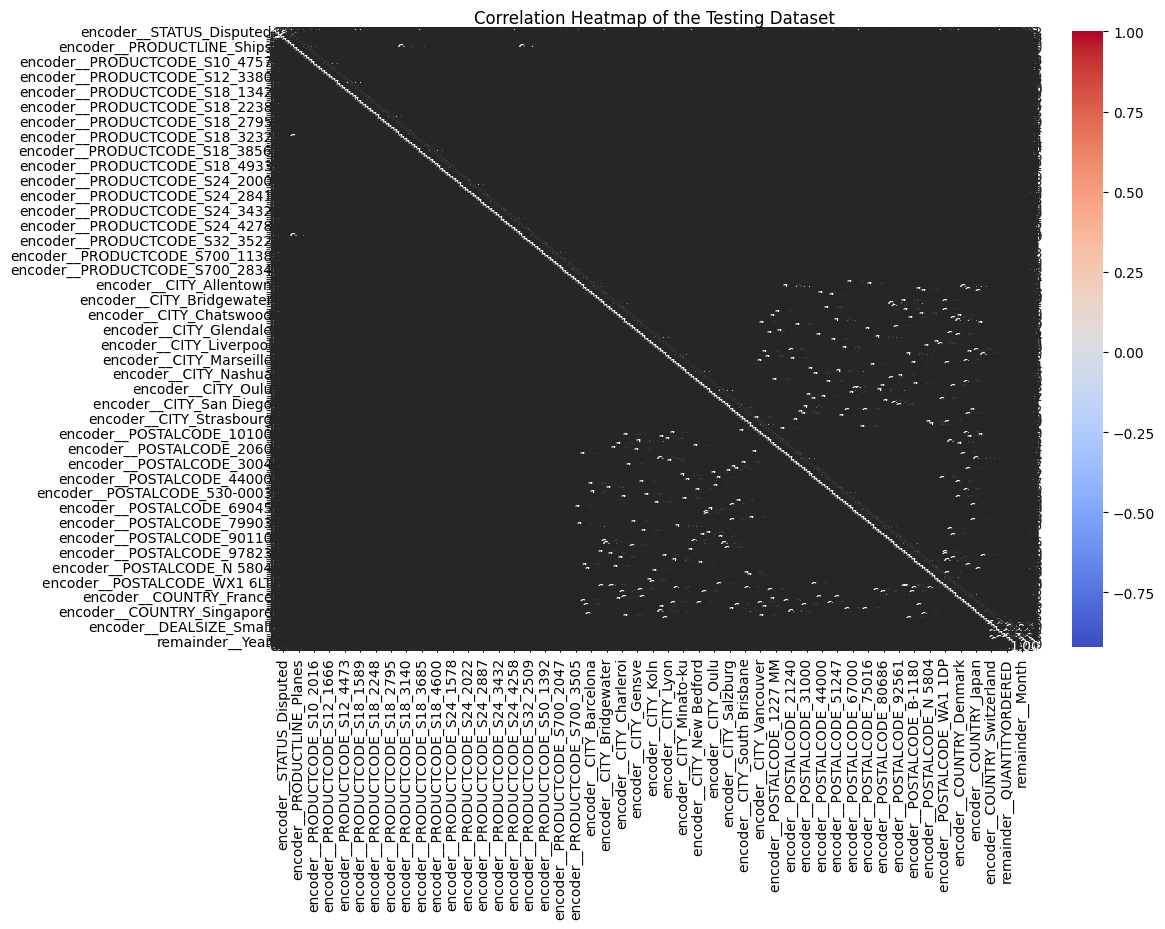

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the correlation heatmap
def plot_correlation_heatmap(data, title):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Compute the correlation matrix
    correlation = numeric_data.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(title)
    plt.show()

# Plot correlation heatmap for the entire dataset
plot_correlation_heatmap(X1, "Correlation Heatmap of the Entire Dataset")

# Convert X_train and X_test back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=ct.get_feature_names_out())
X_test_df = pd.DataFrame(X_test, columns=ct.get_feature_names_out())

# Plot correlation heatmap for the training dataset
plot_correlation_heatmap(X_train_df, "Correlation Heatmap of the Training Dataset")

# Plot correlation heatmap for the testing dataset
plot_correlation_heatmap(X_test_df, "Correlation Heatmap of the Testing Dataset")


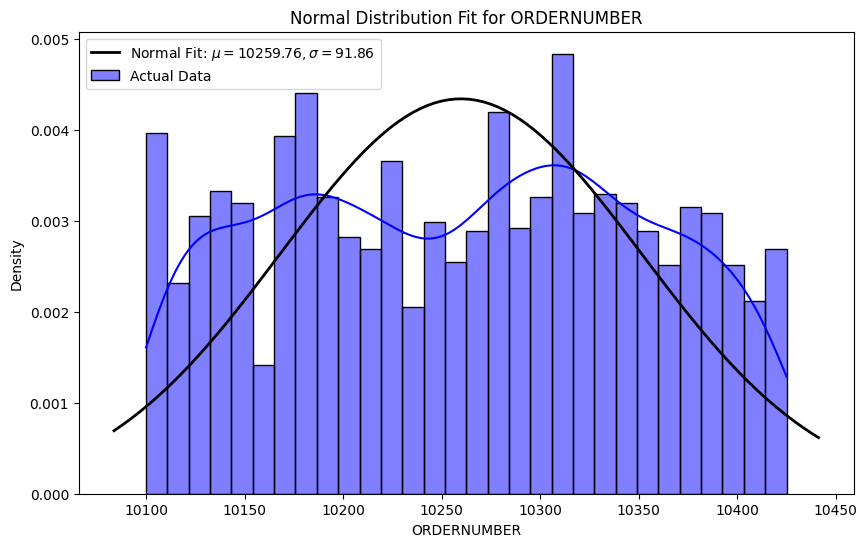

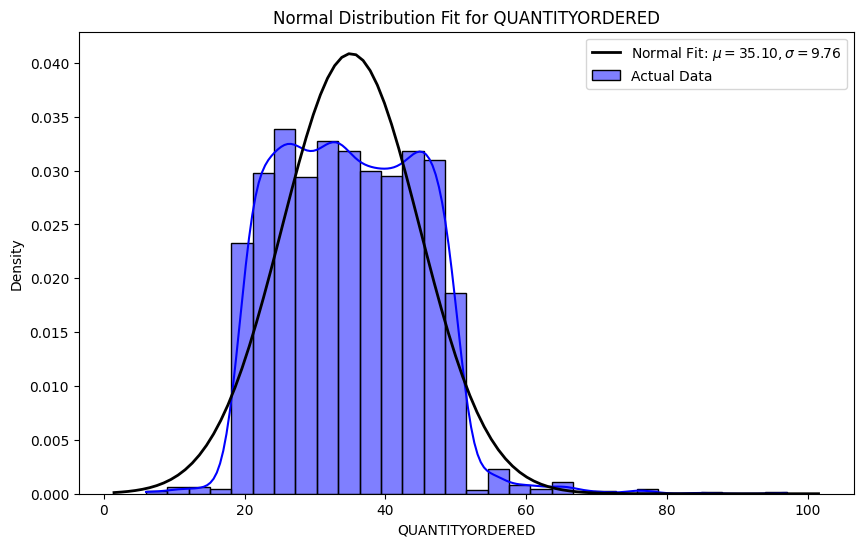

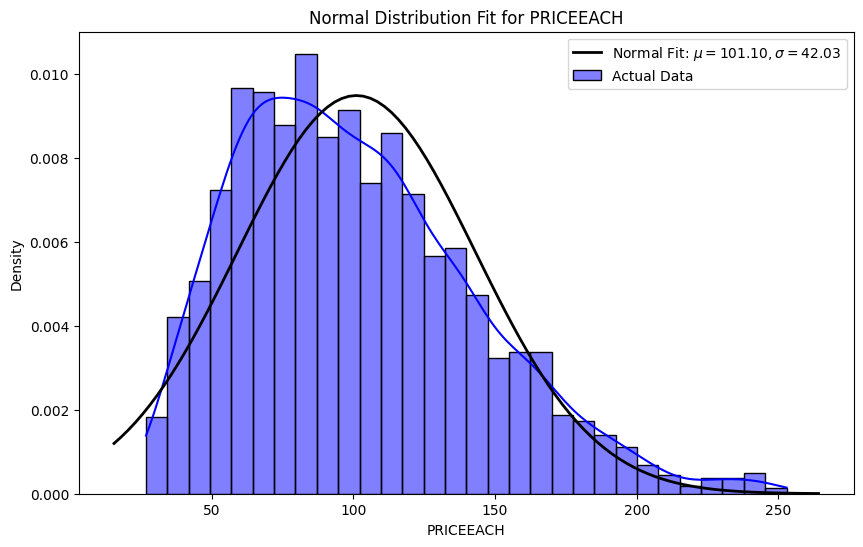

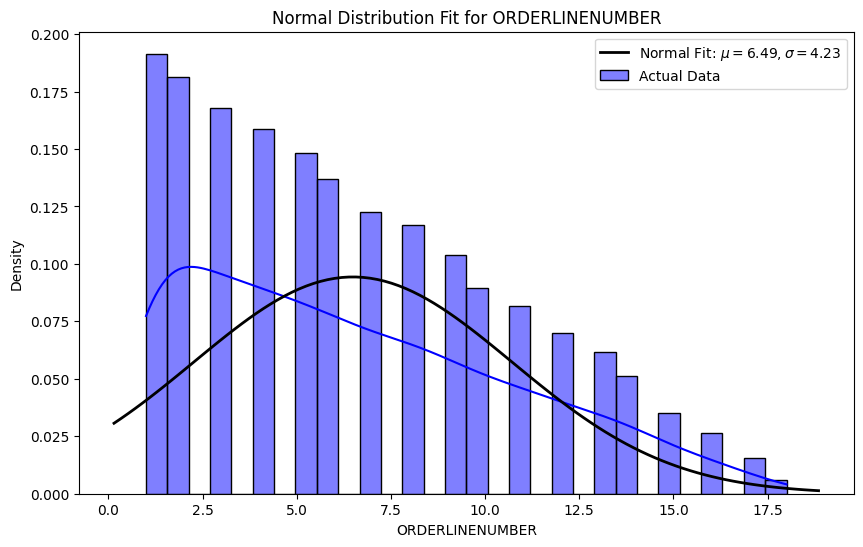

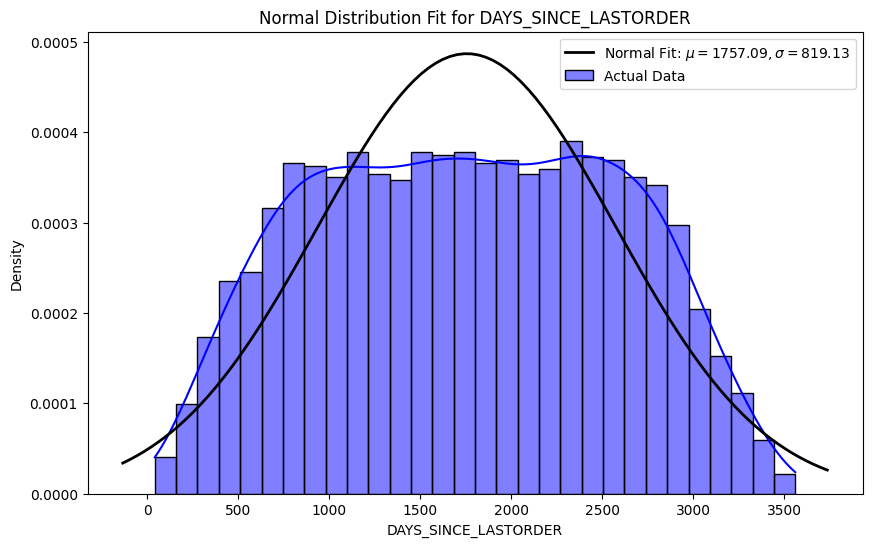

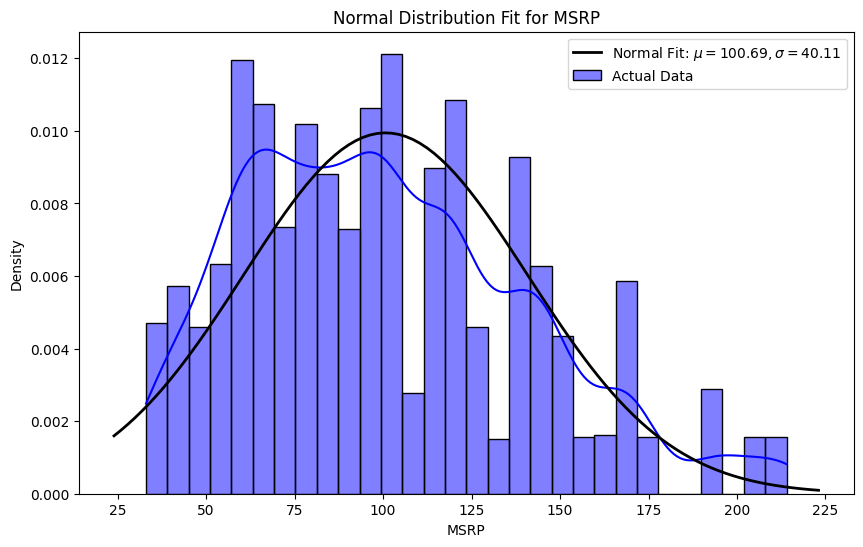

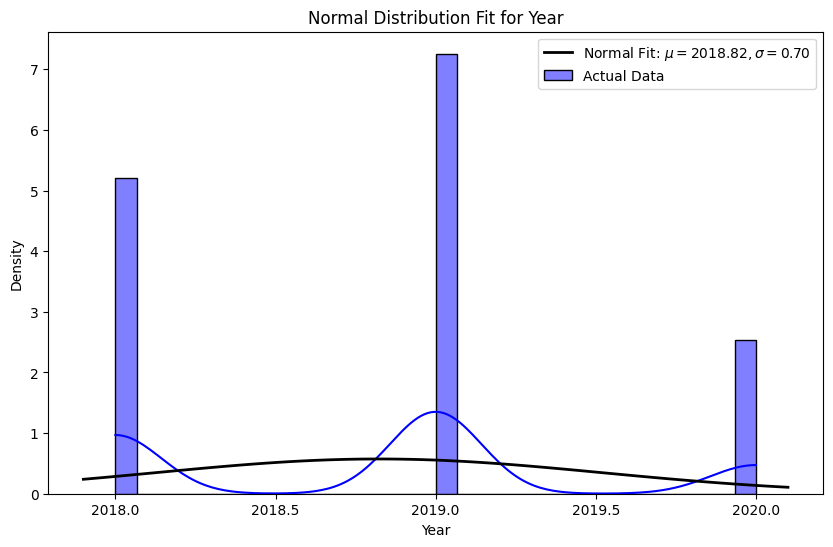

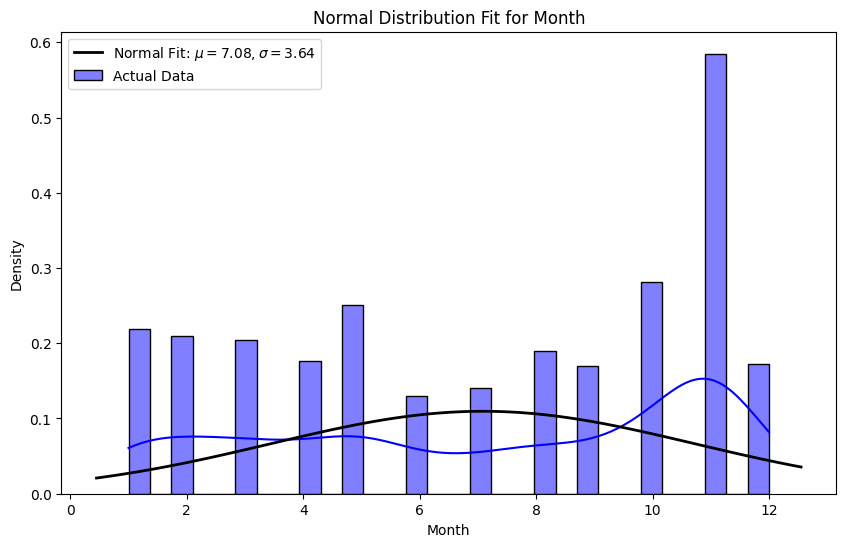

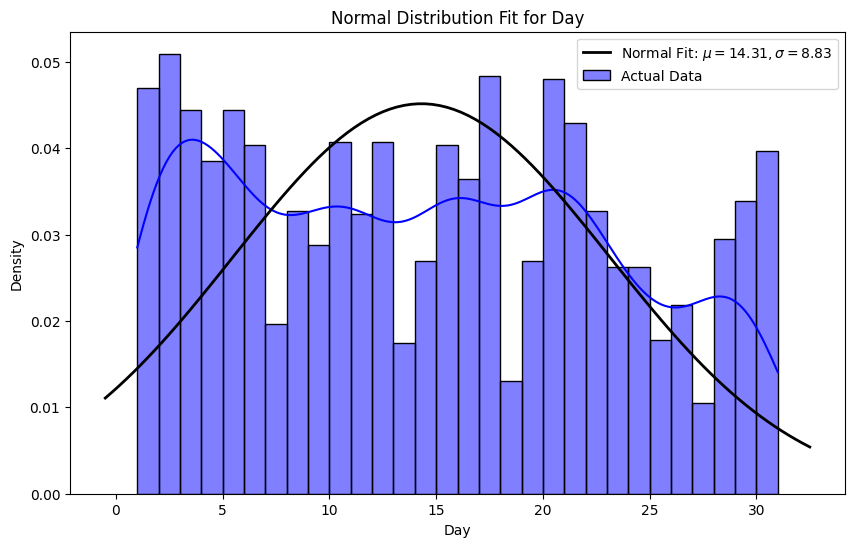

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to plot normal distribution of a column
def plot_normal_distribution(data, column):
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    sns.histplot(data[column], kde=True, stat='density', color='blue', bins=30, label='Actual Data')
    
    # Fit a normal distribution
    mu, std = norm.fit(data[column])  # Fit a normal distribution to the data
    xmin, xmax = plt.xlim()  # Get the axis limits
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Calculate the normal distribution probability density function
    
    # Plot the normal distribution curve
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit: $\mu={mu:.2f}, \sigma={std:.2f}$')
    plt.legend()
    plt.title(f'Normal Distribution Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

# Plot normal distribution for each numeric column in the dataset
numeric_columns = X1.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plot_normal_distribution(X1, column)


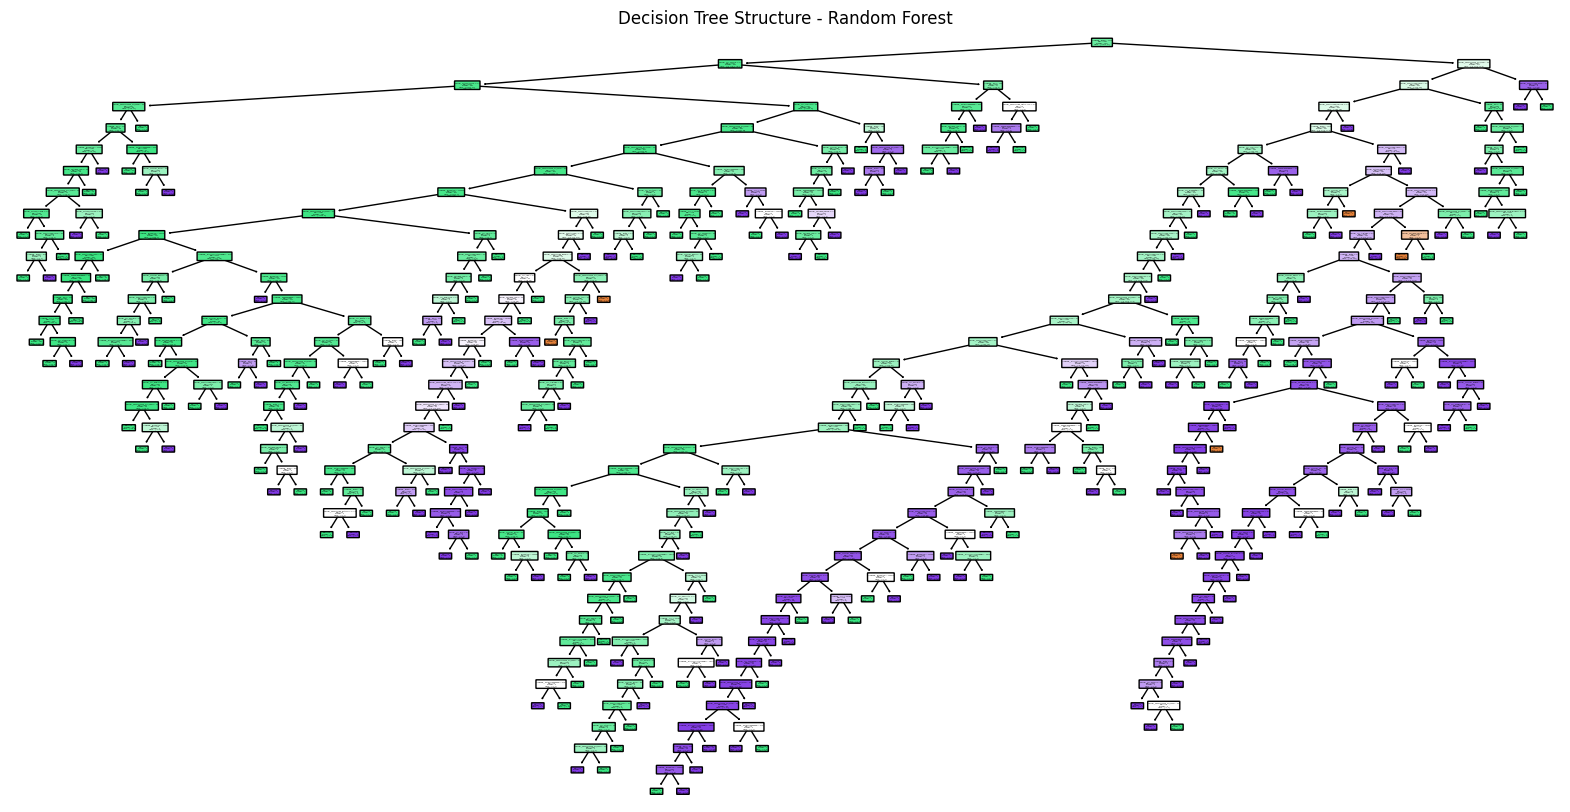

In [54]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor if you're working with regression

# Initialize and train a Random Forest Classifier (or Regressor)
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Extract the first tree from the Random Forest (index 0)
tree = rf_classifier.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train_df.columns, class_names=rf_classifier.classes_, rounded=True, proportion=False)
plt.title("Decision Tree Structure - Random Forest")
plt.show()


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Step 1: Preprocessing - Define transformations for numeric and categorical features
numeric_features = X1.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X1.select_dtypes(include=['object']).columns

# Preprocessing for numeric data (imputation + scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Preprocessing for categorical data (imputation + encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encoding
])

# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 2: Model - Create a pipeline that first applies preprocessing and then trains a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X1, y_class, test_size=0.25, random_state=42)

# Step 4: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.2f}")

# Step 6: Make predictions and print the classification report
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\Comp_3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-validation scores: [0.94902913 0.96359223 0.92961165 0.95873786 0.94417476]
Average cross-validation score: 0.95
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.96      0.99      0.98       544
      Medium       0.95      0.86      0.90       140

    accuracy                           0.96       687
   macro avg       0.64      0.62      0.63       687
weighted avg       0.96      0.96      0.96       687



C:\Users\Comp_3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Comp_3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Comp_3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classific